In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing;
from sklearn import model_selection;
from sklearn import linear_model;
import os
import datetime as dt
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('all_month (2).csv') # from "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv" "https://earthquake.usgs.gov/earthquakes/feed/v1.0/csv.php"

In [ ]:
df.shape

(9504, 22)

In [ ]:
df.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,9504.000000,9504.000000,9504.000000,9504.000000,7543.000000,7543.000000,7322.000000,9504.000000,6919.000000,9504.000000,7524.000000,7543.000000
mean,40.138472,-112.828540,21.332062,1.504059,23.505634,112.388107,0.494839,0.275182,1.611726,2.301531,0.194219,17.911574
std,17.762674,67.696060,50.663758,1.268005,23.064865,63.496568,1.919637,0.291662,3.003462,8.458912,0.130726,29.032919
min,-62.721400,-179.968700,-3.480000,-1.560000,2.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.010333,-150.832750,2.210000,0.750000,9.000000,66.000000,0.010843,0.080000,0.260000,0.430000,0.111000,6.000000
50%,38.822167,-122.782917,7.200000,1.300000,16.000000,95.000000,0.046075,0.160000,0.430000,0.710000,0.168000,11.000000
75%,53.886750,-116.163050,15.807500,1.900000,30.000000,144.000000,0.127550,0.430000,0.983564,1.600000,0.239000,19.000000
max,78.816500,179.997000,619.078000,7.400000,318.000000,357.000000,40.368000,8.550000,42.350000,639.800000,1.380000,658.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9504 entries, 0 to 9503
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             9504 non-null   object 
 1   latitude         9504 non-null   float64
 2   longitude        9504 non-null   float64
 3   depth            9504 non-null   float64
 4   mag              9504 non-null   float64
 5   magType          9504 non-null   object 
 6   nst              7543 non-null   float64
 7   gap              7543 non-null   float64
 8   dmin             7322 non-null   float64
 9   rms              9504 non-null   float64
 10  net              9504 non-null   object 
 11  id               9504 non-null   object 
 12  updated          9504 non-null   object 
 13  place            9504 non-null   object 
 14  type             9504 non-null   object 
 15  horizontalError  6919 non-null   float64
 16  depthError       9504 non-null   float64
 17  magError      

In [ ]:
df.isnull().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                1961
gap                1961
dmin               2182
rms                   0
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError    2585
depthError            0
magError           1980
magNst             1961
status                0
locationSource        0
magSource             0
dtype: int64

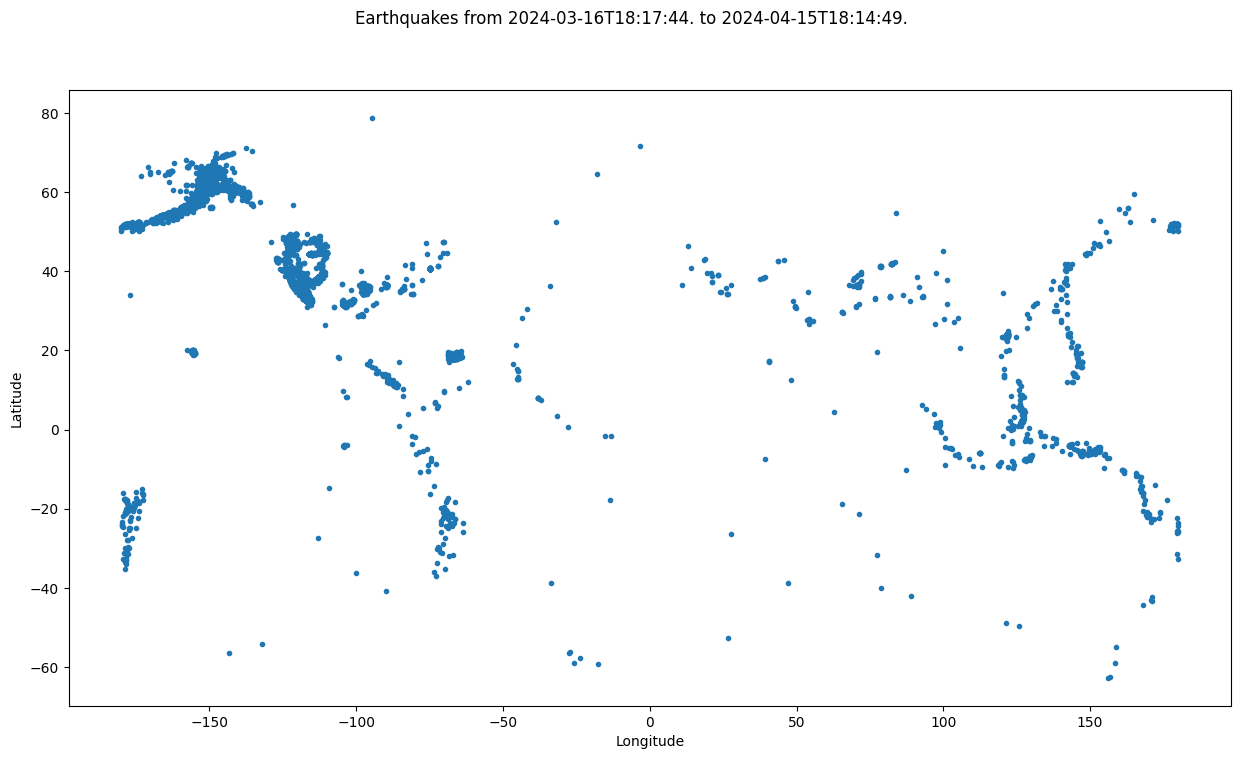

In [ ]:
rounding_factor = 10
fig, ax = plt.subplots(figsize=(15,8))

plt.plot(np.round(df['longitude'].head(10500),rounding_factor),
         np.round(df['latitude'].head(10500),rounding_factor),
         linestyle='none', marker='.')

plt.suptitle('Earthquakes from ' + str(np.min(df['time']))[:20] + ' to ' + str(np.max(df['time']))[:20])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [ ]:
df = df.sort_values('time', ascending=True)

df['date'] = df['time'].str[0:10]
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,date
9503,2024-03-16T18:17:44.020Z,34.278667,-97.5795,5.730,1.44,ml,25.0,63.0,0.122376,0.30,...,"9 km WNW of Healdton, Oklahoma",earthquake,NaN,1.100,0.200,9.0,reviewed,ok,ok,2024-03-16
9502,2024-03-16T18:20:23.949Z,58.986900,-153.0524,66.900,1.70,ml,NaN,NaN,NaN,0.73,...,"76 km WSW of Nanwalek, Alaska",earthquake,NaN,0.800,NaN,NaN,reviewed,ak,ak,2024-03-16
9501,2024-03-16T18:29:55.566Z,62.456800,-149.3134,5.600,1.40,ml,NaN,NaN,NaN,0.74,...,"40 km E of Chase, Alaska",earthquake,NaN,0.300,NaN,NaN,reviewed,ak,ak,2024-03-16
9500,2024-03-16T18:37:08.513Z,-2.830700,129.1983,17.240,4.20,mb,22.0,79.0,1.822000,1.05,...,"57 km NNE of Masohi, Indonesia",earthquake,5.73,5.312,0.152,13.0,reviewed,us,us,2024-03-16
9499,2024-03-16T18:38:30.950Z,51.912400,178.0128,137.387,3.10,ml,23.0,160.0,0.311000,0.64,...,"Rat Islands, Aleutian Islands, Alaska",earthquake,7.64,4.464,0.077,22.0,reviewed,us,us,2024-03-16


In [ ]:
df = df[['date', 'latitude', 'longitude', 'depth', 'mag', 'place']]

newdf = df['place'].str.split(', ', expand=True)

In [ ]:
newdf.head()

,0,1,2
9503,9 km WNW of Healdton,Oklahoma,None
9502,76 km WSW of Nanwalek,Alaska,None
9501,40 km E of Chase,Alaska,None
9500,57 km NNE of Masohi,Indonesia,None
9499,Rat Islands,Aleutian Islands,Alaska


In [ ]:
df['place'] = newdf[1]
df = df[['date', 'latitude', 'longitude', 'depth', 'mag', 'place']]

In [ ]:
df.head()

,date,latitude,longitude,depth,mag,place
9503,2024-03-16,34.278667,-97.5795,5.730,1.44,Oklahoma
9502,2024-03-16,58.986900,-153.0524,66.900,1.70,Alaska
9501,2024-03-16,62.456800,-149.3134,5.600,1.40,Alaska
9500,2024-03-16,-2.830700,129.1983,17.240,4.20,Indonesia
9499,2024-03-16,51.912400,178.0128,137.387,3.10,Aleutian Islands


In [ ]:
print('total locations:',len(set(df['place'])))

total locations: 97


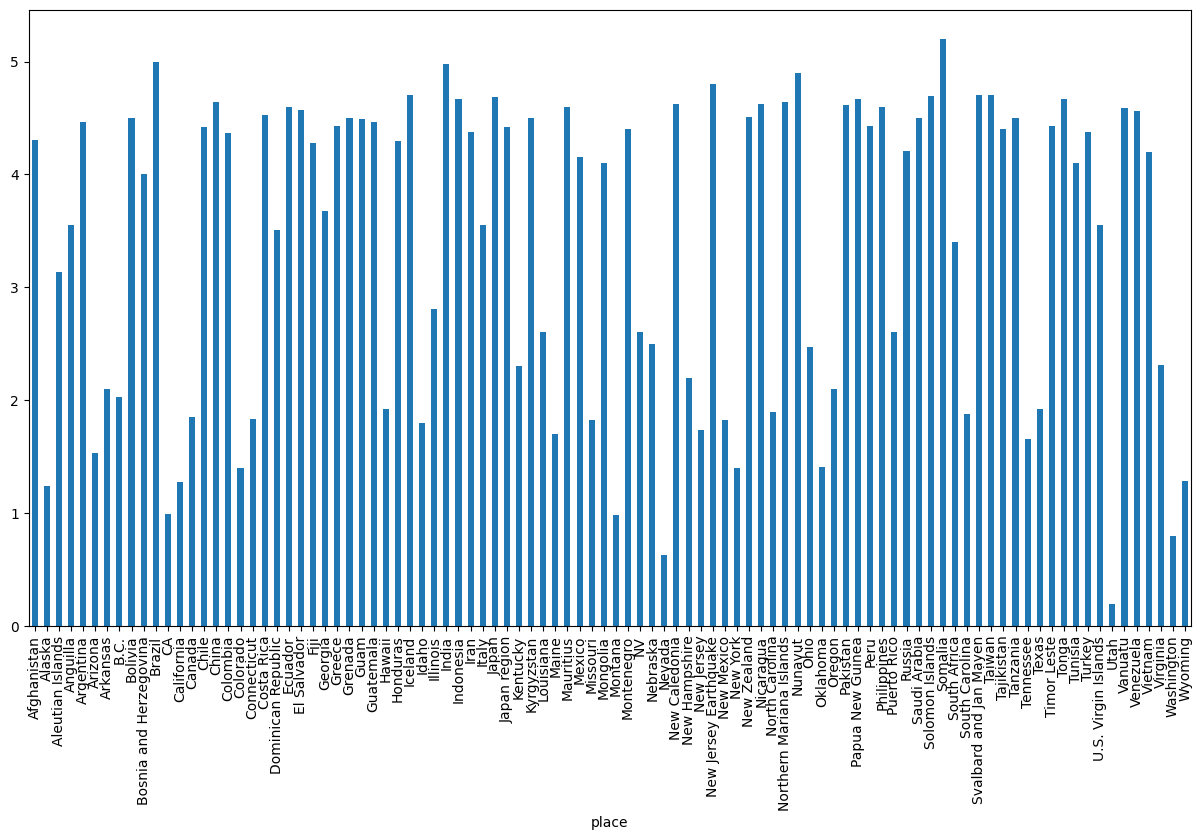

In [ ]:
df.groupby(['place'])['mag'].mean().plot(kind='bar',figsize=(15,8));

<Axes: xlabel='place'>

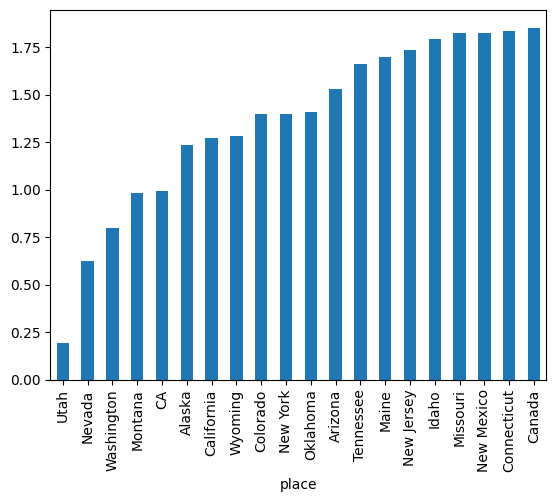

In [ ]:
df.groupby(['place'])['mag'].mean().nsmallest(20).plot(kind='bar')

<Axes: xlabel='place'>

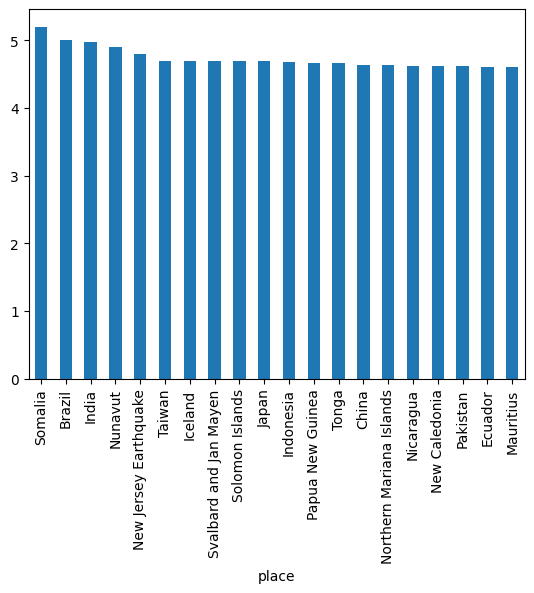

In [ ]:
df.groupby(['place'])['mag'].mean().nlargest(20).plot(kind='bar')

In [ ]:
more_dangerous_places=df.groupby('place')['mag'].mean()
more_dangerous_places=more_dangerous_places[more_dangerous_places>3]

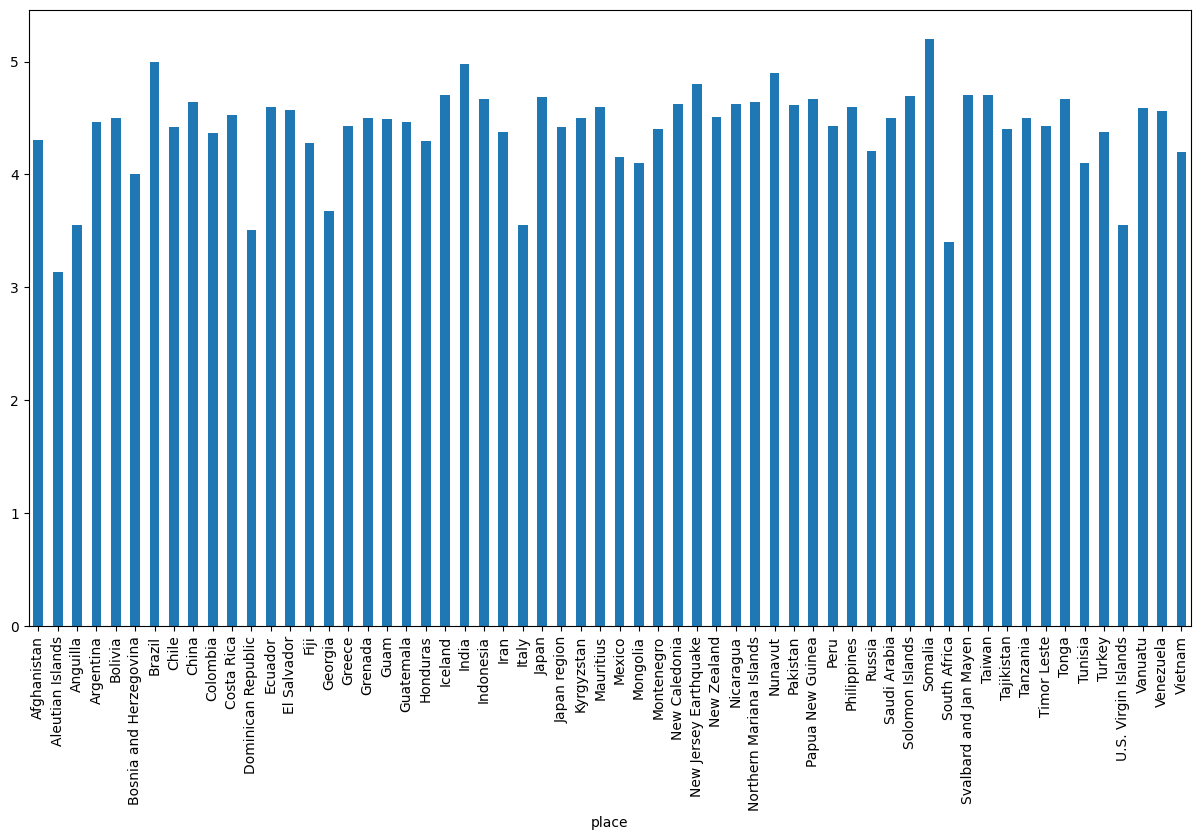

In [ ]:
more_dangerous_places.plot(kind='bar',figsize= (15,8));

In [ ]:
df_coords = df[['place', 'latitude', 'longitude']]
df_coords = df_coords.groupby(['place'], as_index=False).mean()
df_coords = df_coords[['place', 'latitude', 'longitude']]

In [ ]:
df_coords.head()

,place,latitude,longitude
0,Afghanistan,36.490218,70.607173
1,Alaska,59.518765,-152.293664
2,Aleutian Islands,51.409145,157.206465
3,Anguilla,18.443500,-63.892800
4,Argentina,-26.044762,-66.873146


In [ ]:
df = df[['date', 'depth', 'mag', 'place']]
df = pd.merge(left=df, right=df_coords, how='inner', on=['place'])
df.head()

print('total locations:',len(set(df['place'])))

total locations: 96


In [ ]:
print(set(df['place']))

{'Missouri', 'Kentucky', 'Mongolia', 'Iran', 'Colorado', 'Nebraska', 'Washington', 'Japan region', 'Pakistan', 'U.S. Virgin Islands', 'Russia', 'Iceland', 'California', 'Nevada', 'Tonga', 'Japan', 'Solomon Islands', 'El Salvador', 'New Hampshire', 'Honduras', 'Somalia', 'Mauritius', 'New Caledonia', 'Turkey', 'South Africa', 'Brazil', 'Texas', 'Anguilla', 'Papua New Guinea', 'Fiji', 'Grenada', 'Canada', 'Montenegro', 'Colombia', 'Arkansas', 'Tajikistan', 'NV', 'Connecticut', 'Philippines', 'Peru', 'Maine', 'Idaho', 'Virginia', 'Tunisia', 'Bolivia', 'New Jersey', 'Mexico', 'New Mexico', 'Nunavut', 'Aleutian Islands', 'Kyrgyzstan', 'New Jersey Earthquake', 'Montana', 'Argentina', 'CA', 'North Carolina', 'Wyoming', 'Northern Mariana Islands', 'Dominican Republic', 'Afghanistan', 'Vanuatu', 'Oregon', 'Bosnia and Herzegovina', 'Illinois', 'New Zealand', 'Nicaragua', 'Costa Rica', 'Tanzania', 'Georgia', 'Venezuela', 'Taiwan', 'Italy', 'Utah', 'Greece', 'Timor Leste', 'Indonesia', 'Tennessee'

In [ ]:
df.head()

,date,depth,mag,place,latitude,longitude
0,2024-03-16,5.73,1.44,Oklahoma,35.471218,-97.067895
1,2024-03-16,5.56,1.91,Oklahoma,35.471218,-97.067895
2,2024-03-16,5.90,1.31,Oklahoma,35.471218,-97.067895
3,2024-03-16,5.50,1.78,Oklahoma,35.471218,-97.067895
4,2024-03-17,12.00,1.63,Oklahoma,35.471218,-97.067895


In [ ]:
eq_tmp = df.copy()

DAYS_OUT_TO_PREDICT = 7

eq_data = []
eq_data_last_days_out = []

for place in list(set(eq_tmp['place'])):
    temp_df = eq_tmp[eq_tmp['place'] == place].copy()

    temp_df['depth_avg_22'] = temp_df['depth'].rolling(window=22,center=False).mean()
    temp_df['depth_avg_15'] = temp_df['depth'].rolling(window=15,center=False).mean()
    temp_df['depth_avg_7'] = temp_df['depth'].rolling(window=7,center=False).mean()
    temp_df['mag_avg_22'] = temp_df['mag'].rolling(window=22,center=False).mean()
    temp_df['mag_avg_15'] = temp_df['mag'].rolling(window=15,center=False).mean()
    temp_df['mag_avg_7'] = temp_df['mag'].rolling(window=7,center=False).mean()
    temp_df.loc[:, 'mag_outcome'] = temp_df.loc[:, 'mag_avg_7'].shift(DAYS_OUT_TO_PREDICT * -1)


    eq_data_last_days_out.append(temp_df.tail(DAYS_OUT_TO_PREDICT))

    eq_data.append(temp_df)

In [ ]:
eq_all = pd.concat(eq_data)

In [ ]:
eq_all.head()

,date,depth,mag,place,latitude,longitude,depth_avg_22,depth_avg_15,depth_avg_7,mag_avg_22,mag_avg_15,mag_avg_7,mag_outcome
8937,2024-03-17,9.25,1.38,Missouri,36.479774,-89.675286,NaN,NaN,NaN,NaN,NaN,NaN,1.657143
8938,2024-03-21,9.65,1.35,Missouri,36.479774,-89.675286,NaN,NaN,NaN,NaN,NaN,NaN,1.768571
8939,2024-03-26,7.33,1.22,Missouri,36.479774,-89.675286,NaN,NaN,NaN,NaN,NaN,NaN,1.941429
8940,2024-03-27,9.05,2.15,Missouri,36.479774,-89.675286,NaN,NaN,NaN,NaN,NaN,NaN,1.860000
8941,2024-03-27,7.33,1.86,Missouri,36.479774,-89.675286,NaN,NaN,NaN,NaN,NaN,NaN,2.000000


In [ ]:
eq_all = eq_all[np.isfinite(eq_all['depth_avg_22'])]
eq_all = eq_all[np.isfinite(eq_all['mag_avg_22'])]
eq_all = eq_all[np.isfinite(eq_all['mag_outcome'])]

In [ ]:
eq_all.head()

,date,depth,mag,place,latitude,longitude,depth_avg_22,depth_avg_15,depth_avg_7,mag_avg_22,mag_avg_15,mag_avg_7,mag_outcome
8264,2024-03-19,11.67,0.89,Washington,46.893574,-122.197592,9.857273,10.536000,12.572857,0.673636,0.711333,0.470000,0.981429
8265,2024-03-19,27.88,1.49,Washington,46.893574,-122.197592,10.806818,12.246667,16.815714,0.731818,0.834000,0.822857,0.807143
8266,2024-03-19,19.98,2.17,Washington,46.893574,-122.197592,11.337727,13.080667,16.481429,0.826818,0.963333,0.948571,0.514286
8267,2024-03-19,9.12,1.45,Washington,46.893574,-122.197592,11.833182,13.411333,15.157143,0.867727,1.028000,1.030000,0.337143
8268,2024-03-19,16.11,0.91,Washington,46.893574,-122.197592,12.157273,14.536667,14.940000,0.865455,0.961333,0.998571,0.431429


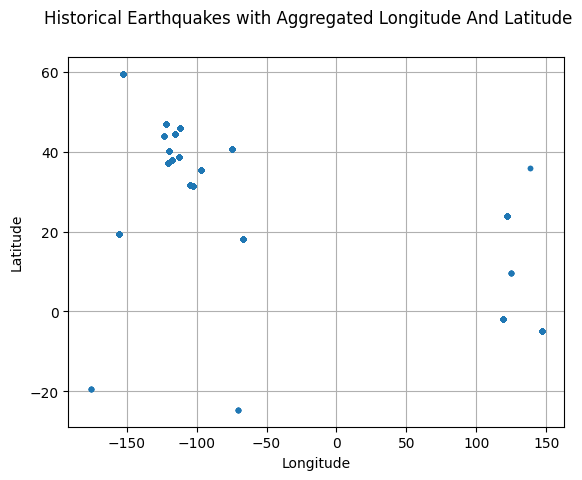

In [ ]:
plt.plot(eq_all['longitude'],
         eq_all['latitude'],
         linestyle='none', marker='.')
plt.suptitle('Historical Earthquakes with Aggregated Longitude And Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()
plt.show()

In [ ]:
eq_data_last_days_out = pd.concat(eq_data_last_days_out)


eq_data_last_days_out = eq_data_last_days_out[np.isfinite(eq_data_last_days_out['mag_avg_22'])]
predict_unknown=eq_data_last_days_out

In [ ]:
predict_unknown

,date,depth,mag,place,latitude,longitude,depth_avg_22,depth_avg_15,depth_avg_7,mag_avg_22,mag_avg_15,mag_avg_7,mag_outcome
8526,2024-04-13,11.68,2.16,Washington,46.893574,-122.197592,10.073636,10.924000,8.140000,0.870455,0.933333,1.207143,NaN
8527,2024-04-13,20.04,1.79,Washington,46.893574,-122.197592,10.329545,11.034000,11.127143,0.935000,0.972667,1.212857,NaN
8528,2024-04-13,-0.23,1.39,Washington,46.893574,-122.197592,10.400000,10.601333,11.147143,1.006364,1.034667,1.231429,NaN
8529,2024-04-14,-1.85,-1.03,Washington,46.893574,-122.197592,9.897727,9.619333,10.911429,0.930000,0.944000,0.890000,NaN
8530,2024-04-14,20.47,0.72,Washington,46.893574,-122.197592,10.480000,10.590667,11.234286,0.969545,0.996667,0.858571,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2937,2024-04-15,14.10,0.80,Alaska,59.518765,-152.293664,29.387136,31.620000,32.085714,1.440909,1.346667,1.342857,NaN
2938,2024-04-15,0.00,1.90,Alaska,59.518765,-152.293664,29.387136,30.960000,20.228571,1.459091,1.413333,1.385714,NaN
2939,2024-04-15,11.60,1.30,Alaska,59.518765,-152.293664,28.104545,27.380000,21.885714,1.354545,1.426667,1.271429,NaN
2940,2024-04-15,13.80,1.20,Alaska,59.518765,-152.293664,27.200000,27.193333,23.857143,1.354545,1.426667,1.214286,NaN


In [ ]:
eq_all['mag_outcome'] = np.where(eq_all['mag_outcome'] > 2.5, 1,0)
print(eq_all['mag_outcome'].describe())
eq_all['mag_outcome'].value_counts()

count    8257.000000
mean        0.034758
std         0.183178
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: mag_outcome, dtype: float64


mag_outcome
0    7970
1     287
Name: count, dtype: int64

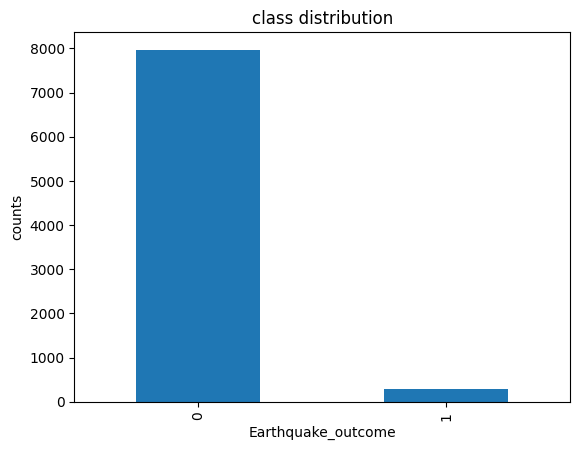

In [ ]:
eq_all['mag_outcome'].value_counts().plot(kind='bar',)
plt.xlabel('Earthquake_outcome')
plt.ylabel('counts')
plt.title('class distribution');

In [ ]:
eq_all.to_csv("Earthquake_features.csv", sep=',', index=False, encoding='utf-8')
predict_unknown.to_csv("Earthquake_predict.csv", sep=',', index=False, encoding='utf-8')